In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
adv = pd.read_csv("./data/Advertising.csv", index_col=0)
adv

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [35]:
adv.shape

(200, 4)

In [36]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


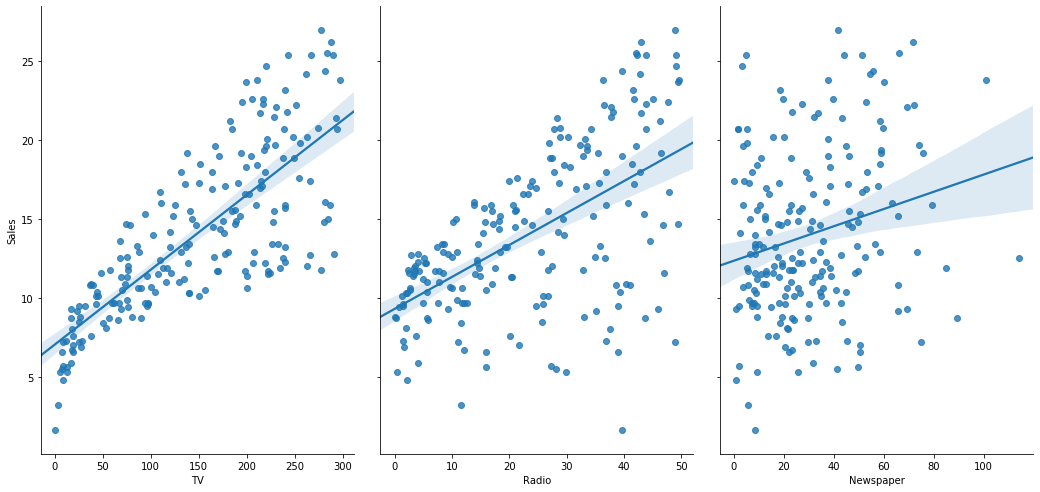

In [37]:
sns.pairplot(adv, x_vars=["TV","Radio","Newspaper"],y_vars="Sales", height=7, aspect=0.7, kind="reg")

In [55]:
x = adv.iloc[:,:3]
y = adv.iloc[:,3]

In [56]:
x.shape, y.shape

((200, 3), (200,))

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
X_train, X_test, y_train, y_test = \
    train_test_split(x,y,random_state=7)

In [59]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
print("훈련점수:",model.score(X_train,y_train))
print("테스트점수:",model.score(X_test,y_test))

훈련점수: 0.8933316510408247
테스트점수: 0.9044150723953953


In [44]:
print(model.coef_) #가중치 확인 coef_
print(model.intercept_)#절편 확인

[0.04416235 0.19900368 0.00116268]
2.89257005115115


### y = w1x1 + w2x2 + w3+x3 +b
### y = 0.044*TV + 0.199*Radio + 0.001*Newspaper + 2.89

## 신문을 제외하고 분석

In [61]:
x = adv.iloc[:,:2]
y = adv.iloc[:,3]

In [62]:
x.shape, y.shape

((200, 2), (200,))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1000)

In [80]:
y_train

189    15.9
23      5.6
66      9.3
160    12.9
18     24.4
       ... 
95     11.5
193     5.9
72     12.4
88     16.0
180    12.6
Name: Sales, Length: 150, dtype: float64

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
print("훈련점수:",model.score(X_train,y_train))
print("테스트점수:",model.score(X_test,y_test))

훈련점수: 0.8946328224149581
테스트점수: 0.8924909270447043


## RMSE

In [83]:
pre = model.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error

In [88]:
np.sqrt(mean_squared_error(pre,y_test))

1.4657925334894033

## 점수를 더 올릴수 있는 방법

In [89]:
adv = pd.read_csv("./data/Advertising.csv",index_col=0)

In [90]:
x = adv.iloc[:,:2]
y = adv.iloc[:,3]

In [91]:
x.shape, y.shape

((200, 2), (200,))

In [94]:
col = x.columns
len(col), col.size 

(2, 2)

In [95]:
for i in range(col.size):
    print(col[i])

TV
Radio


In [97]:
for i in range(col.size):
    for j in range(i,col.size):
        print(col[i],col[j])
        x[col[i]+"x"+col[j]] = x[col[i]]*x[col[j]]

TV TV
TV Radio
Radio Radio


C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [98]:
x

,TV,Radio,TVxTV,TVxRadio,RadioxRadio
1,230.1,37.8,52946.01,8697.78,1428.84
2,44.5,39.3,1980.25,1748.85,1544.49
3,17.2,45.9,295.84,789.48,2106.81
4,151.5,41.3,22952.25,6256.95,1705.69
5,180.8,10.8,32688.64,1952.64,116.64
...,...,...,...,...,...
196,38.2,3.7,1459.24,141.34,13.69
197,94.2,4.9,8873.64,461.58,24.01
198,177.0,9.3,31329.00,1646.10,86.49
199,283.6,42.0,80428.96,11911.20,1764.00


In [104]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [100]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
print("훈련점수:",model.score(X_train,y_train))
print("테스트점수:",model.score(X_test,y_test))

훈련점수: 0.9903544002351797
테스트점수: 0.9730995932388276


## 스케일링
- 0과 1사이 -> 정확도 높힘
- 이상치에 민감 -> 이상치 제거 후 분석

In [106]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [113]:
scaler = MinMaxScaler()
#scaler.fit(X_train) #학습
#X_train = scaler.transform(X_train) #학습시킨 데이터로 적용해서 나온 결과
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
model = LinearRegression()
model.fit(X_train,y_train)
print("훈련점수:",model.score(X_train,y_train))
print("테스트점수:",model.score(X_test,y_test))

훈련점수: 0.9906445079991302
테스트점수: 0.971926985749356


In [114]:
scaler = StandardScaler()
#scaler.fit(X_train) #학습
#X_train = scaler.transform(X_train) #학습시킨 데이터로 적용해서 나온 결과
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
model = LinearRegression()
model.fit(X_train,y_train)
print("훈련점수:",model.score(X_train,y_train))
print("테스트점수:",model.score(X_test,y_test))

훈련점수: 0.9906445079991302
테스트점수: 0.971926985749356


## 교차검증

In [117]:
adv = pd.read_csv("./data/Advertising.csv",index_col=0)
x = adv.iloc[:,:2]
y = adv.iloc[:,3]

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [122]:
model = Ridge()
result = cross_val_score(model, X_train, y_train, cv=5) #cv = 5개로 분할
print(result)
print(result.mean()) #지금까지 학습한 결과의 평균. 

[0.93531927 0.86176333 0.92797978 0.90347373 0.87798121]
0.9013034642377347


In [124]:
alpha_list = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] #알파 = 제한
for a in alpha_list:
    model=Ridge(alpha = a)
    result = cross_val_score(model, X_train, y_train, cv = 5)
    print("alpha:{}\t score : {}".format(a,result.mean()))

alpha:0	 score : 0.9013036655142301
alpha:0.0001	 score : 0.9013036654941526
alpha:0.001	 score : 0.9013036653134552
alpha:0.01	 score : 0.9013036635064358
alpha:0.1	 score : 0.9013036454317694
alpha:1	 score : 0.9013034642377347
alpha:10	 score : 0.9013016075952269
alpha:100	 score : 0.9012786054806939
alpha:1000	 score : 0.9006376317845997
alpha:10000	 score : 0.873282560617711


In [127]:
model = Ridge(alpha = 0)
model.fit(X_train, y_train)
print("훈련점수:",model.score(X_train,y_train))
print("테스트점수:",model.score(X_test,y_test))

훈련점수: 0.9071991785449653
테스트점수: 0.8580883042722334
